In [1]:
import numpy as np
from scipy.stats import norm, expon, chi2, uniform
import matplotlib.pyplot as plt
%matplotlib inline

# Standard distributions sampling
## Ex 1.
Use scipy to take samples from the following distributions:
1. Normal distribution with $\mu$=1 and $\sigma$=4,
2. Exponential distribution with $\lambda = \dfrac{1}{4}$,
3. Chi-squared distribution with 8 degrees of freedom,
4. Uniform distribution with borders [$-2\sqrt{3}, 6\sqrt{3}$].

Compare their theoretical and sample distribution, mean and variance.

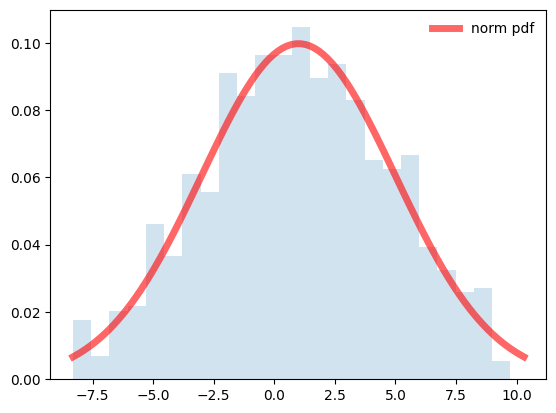

Distribution mean: 1.0
Distribution variance: 16.0
Sample mean: 1.044816001604946
Sample variance: 16.130740833678733


In [2]:
#1. Normal
#This one I'll do for you :-)

rv_norm = norm(loc = 1, scale = 4)
x = np.linspace(rv_norm.ppf(0.01), rv_norm.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = rv_norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_norm.stats(moments='m')))
print("Distribution variance: {0}".format(rv_norm.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

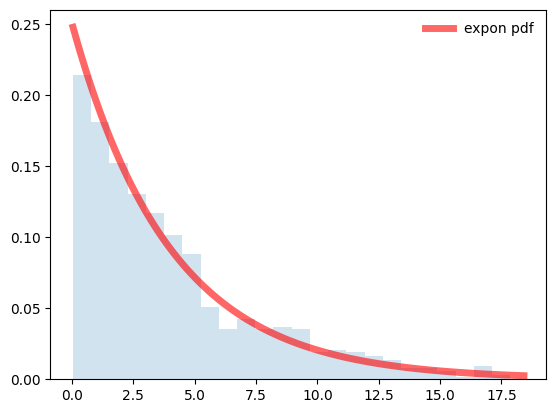

Distribution mean: 4.0
Distribution variance: 16.0
Sample mean: 4.2830727455945725
Sample variance: 18.012313654583522


In [3]:
rv_expon = expon(scale = 4)
x = np.linspace(rv_expon.ppf(0.01), rv_expon.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_expon.pdf(x), 'r-', lw=5, alpha=0.6, label='expon pdf')
r = rv_expon.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])

ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_expon.stats(moments='m')))
print("Distribution variance: {0}".format(rv_expon.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

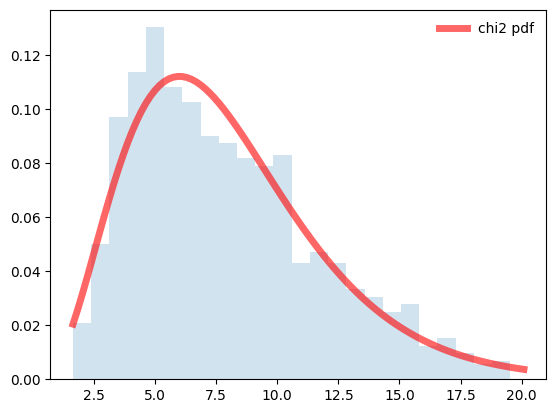

Distribution mean: 8.0
Distribution variance: 16.0
Sample mean: 8.109391425998645
Sample variance: 17.692169576456397


In [4]:
rv_chi2 = chi2(df = 8)
x = np.linspace(rv_chi2.ppf(0.01), rv_chi2.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_chi2.pdf(x), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
r = rv_chi2.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])

ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_chi2.stats(moments='m')))
print("Distribution variance: {0}".format(rv_chi2.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

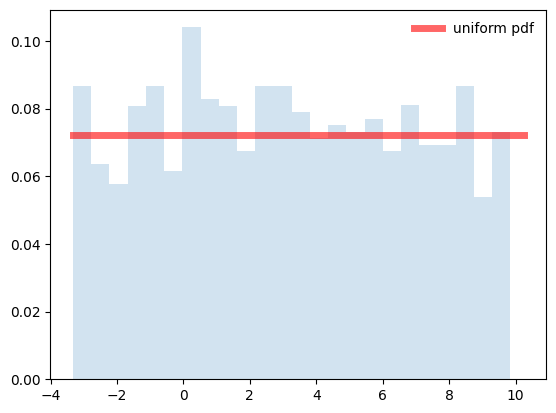

Distribution mean: 3.4641016151377544
Distribution variance: 15.999999999999998
Sample mean: 3.42254663605886
Sample variance: 15.741704727426434


In [5]:
rv_uniform = uniform(loc = -2*np.sqrt(3), scale = 8*np.sqrt(3))
x = np.linspace(rv_uniform.ppf(0.01), rv_uniform.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')
r = rv_uniform.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])

ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_uniform.stats(moments='m')))
print("Distribution variance: {0}".format(rv_uniform.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

Sample values are very close to theoretical. To make it even more precise we can increase number of samples

# Low of large numbers. Central Limit Theorem.
## Ex 2.
a) For N from 2 to 1000 draw N samples from distributions defined in Ex 1. Plot sample variance and mean against the size of the sample.

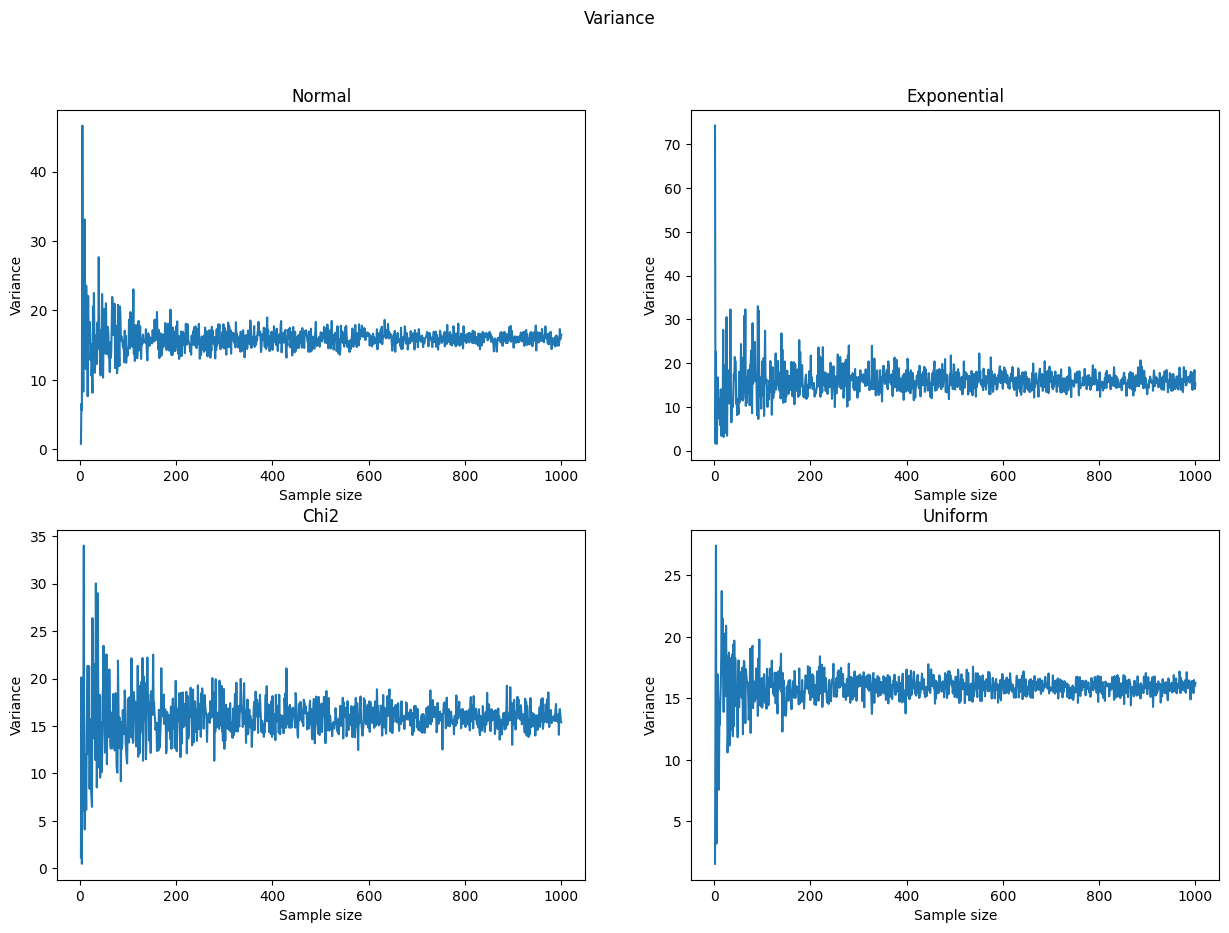

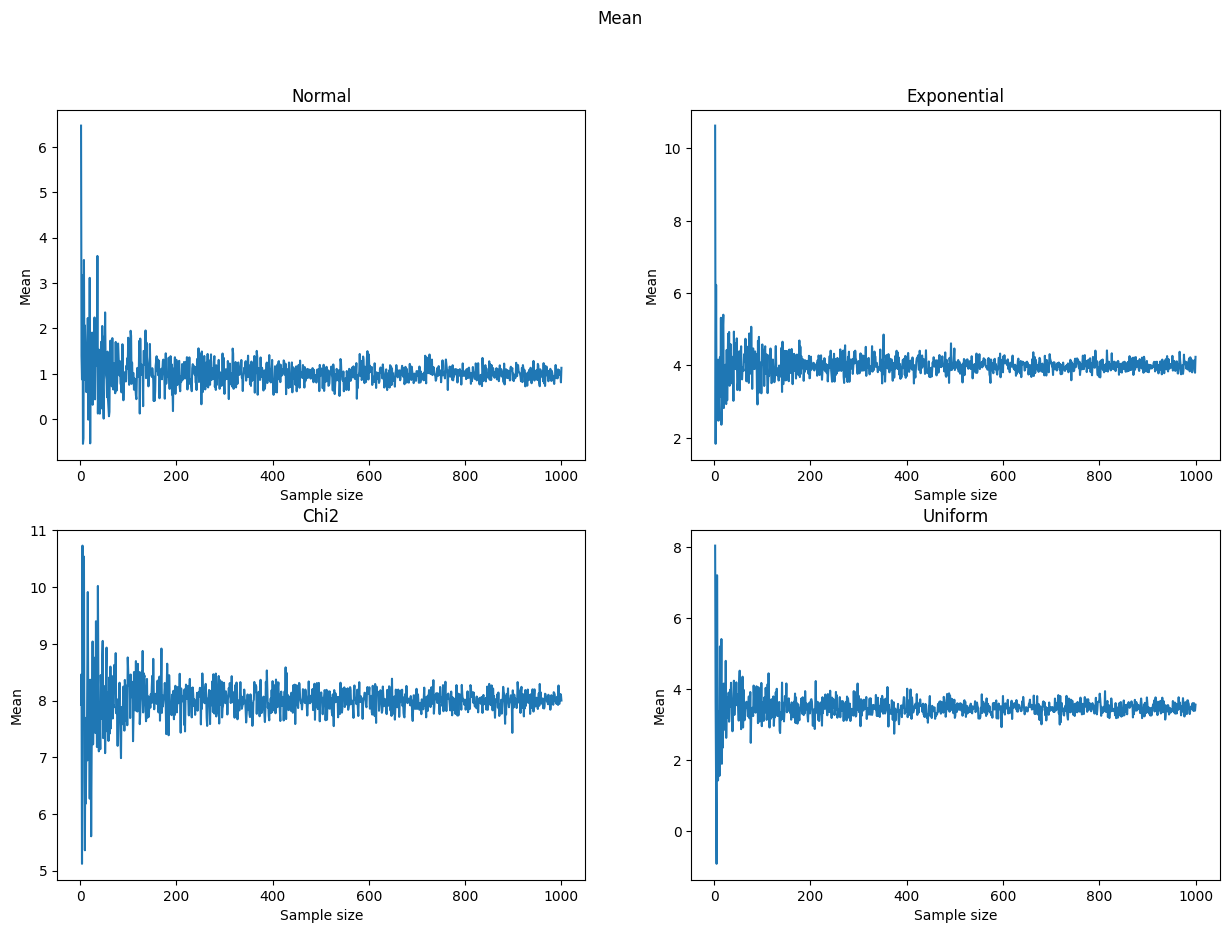

In [6]:
x = [i for i in range(2, 1001)]

r_norm = [rv_norm.rvs(size=i) for i in x]
r_expon = [rv_expon.rvs(size=i) for i in x]
r_chi2 = [rv_chi2.rvs(size=i) for i in x]
r_uniform = [rv_uniform.rvs(size=i) for i in x]

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Variance')

ax[0][0].plot(x, [np.var(i) for i in r_norm])
ax[0][0].set_title("Normal")
ax[0][1].plot(x, [np.var(i) for i in r_expon])
ax[0][1].set_title("Exponential")
ax[1][0].plot(x, [np.var(i) for i in r_chi2])
ax[1][0].set_title("Chi2")
ax[1][1].plot(x, [np.var(i) for i in r_uniform])
ax[1][1].set_title("Uniform")

for a in ax.flat:
    a.set(xlabel='Sample size', ylabel='Variance')

plt.show()

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Mean')

ax[0][0].plot(x, [np.mean(i) for i in r_norm])
ax[0][0].set_title("Normal")
ax[0][1].plot(x, [np.mean(i) for i in r_expon])
ax[0][1].set_title("Exponential")
ax[1][0].plot(x, [np.mean(i) for i in r_chi2])
ax[1][0].set_title("Chi2")
ax[1][1].plot(x, [np.mean(i) for i in r_uniform])
ax[1][1].set_title("Uniform")

for a in ax.flat:
    a.set(xlabel='Sample size', ylabel='Mean')

## Ex 3.
For N=1,4,9,16 draw histograms of an average over N samples taken from distributions defined in Ex 1.

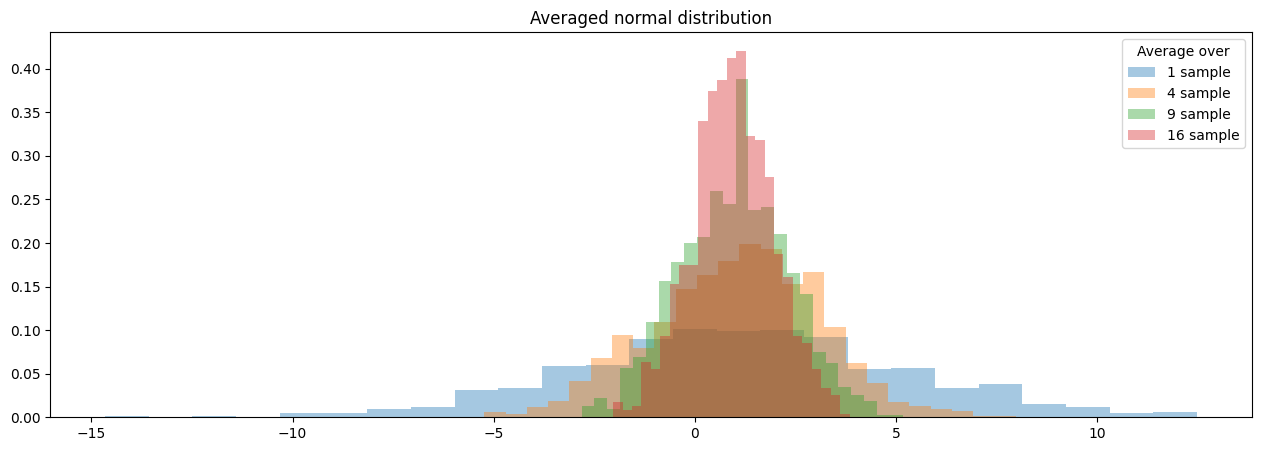

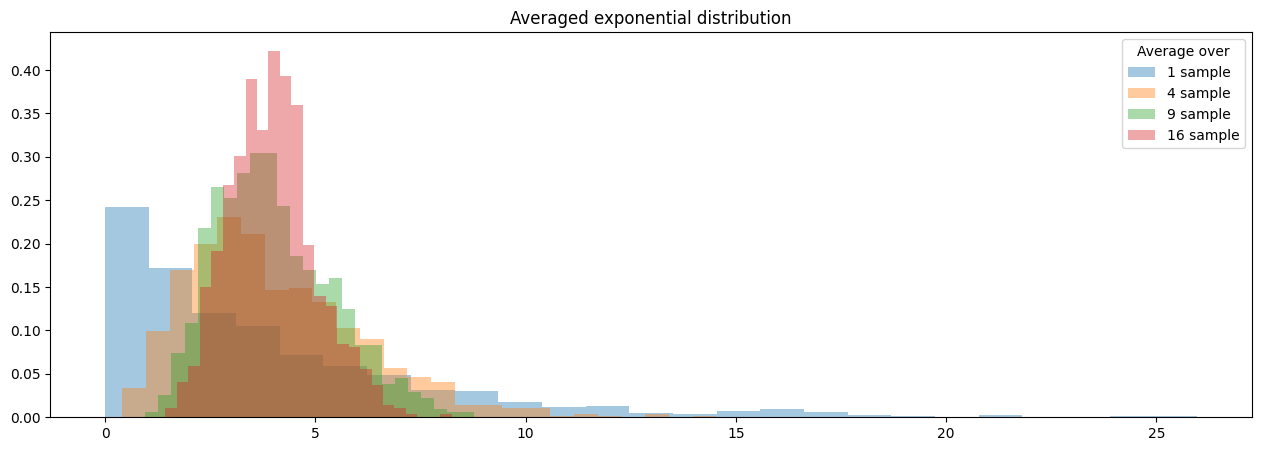

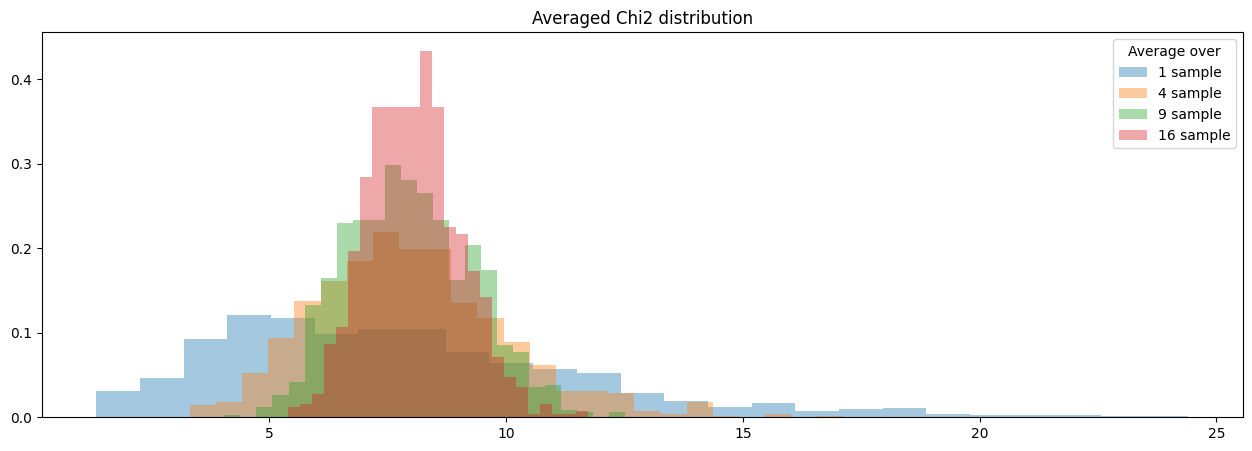

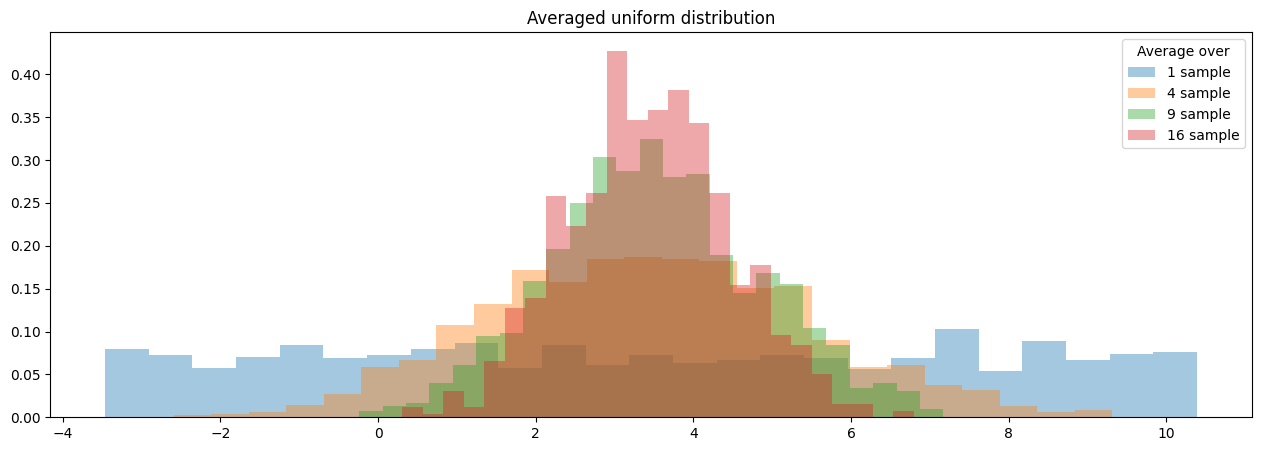

In [7]:
avg1 = np.mean(rv_norm.rvs(size=(1, 1000)), axis=0)
avg4 = np.mean(rv_norm.rvs(size=(4, 1000)), axis=0)
avg9 = np.mean(rv_norm.rvs(size=(9, 1000)), axis=0)
avg16 = np.mean(rv_norm.rvs(size=(16, 1000)), axis=0)

plt.figure(figsize=(15.5, 5))
plt.title("Averaged normal distribution")
plt.hist(avg1, density=True, alpha=0.4, bins=25, label="1 sample")
plt.hist(avg4, density=True, alpha=0.4, bins=25, label="4 sample")
plt.hist(avg9, density=True, alpha=0.4, bins=25, label="9 sample")
plt.hist(avg16, density=True, alpha=0.4, bins=25, label="16 sample")
plt.legend(loc='best', title="Average over")
plt.show()

# ---------------------------------------------

avg1 = np.mean(rv_expon.rvs(size=(1, 1000)), axis=0)
avg4 = np.mean(rv_expon.rvs(size=(4, 1000)), axis=0)
avg9 = np.mean(rv_expon.rvs(size=(9, 1000)), axis=0)
avg16 = np.mean(rv_expon.rvs(size=(16, 1000)), axis=0)

plt.figure(figsize=(15.5, 5))
plt.title("Averaged exponential distribution")
plt.hist(avg1, density=True, alpha=0.4, bins=25, label="1 sample")
plt.hist(avg4, density=True, alpha=0.4, bins=25, label="4 sample")
plt.hist(avg9, density=True, alpha=0.4, bins=25, label="9 sample")
plt.hist(avg16, density=True, alpha=0.4, bins=25, label="16 sample")
plt.legend(loc='best', title="Average over")
plt.show()

# ---------------------------------------------

avg1 = np.mean(rv_chi2.rvs(size=(1, 1000)), axis=0)
avg4 = np.mean(rv_chi2.rvs(size=(4, 1000)), axis=0)
avg9 = np.mean(rv_chi2.rvs(size=(9, 1000)), axis=0)
avg16 = np.mean(rv_chi2.rvs(size=(16, 1000)), axis=0)

plt.figure(figsize=(15.5, 5))
plt.title("Averaged Chi2 distribution")
plt.hist(avg1, density=True, alpha=0.4, bins=25, label="1 sample")
plt.hist(avg4, density=True, alpha=0.4, bins=25, label="4 sample")
plt.hist(avg9, density=True, alpha=0.4, bins=25, label="9 sample")
plt.hist(avg16, density=True, alpha=0.4, bins=25, label="16 sample")
plt.legend(loc='best', title="Average over")
plt.show()

# ---------------------------------------------

avg1 = np.mean(rv_uniform.rvs(size=(1, 1000)), axis=0)
avg4 = np.mean(rv_uniform.rvs(size=(4, 1000)), axis=0)
avg9 = np.mean(rv_uniform.rvs(size=(9, 1000)), axis=0)
avg16 = np.mean(rv_uniform.rvs(size=(16, 1000)), axis=0)

plt.figure(figsize=(15.5, 5))
plt.title("Averaged uniform distribution")
plt.hist(avg1, density=True, alpha=0.4, bins=25, label="1 sample")
plt.hist(avg4, density=True, alpha=0.4, bins=25, label="4 sample")
plt.hist(avg9, density=True, alpha=0.4, bins=25, label="9 sample")
plt.hist(avg16, density=True, alpha=0.4, bins=25, label="16 sample")
plt.legend(loc='best', title="Average over")
plt.show()

The central limit theorem posits that when numerous samples are drawn from a population, the distribution of their means will closely resemble a normal distribution. In practical terms, this implies that as the sample size in a single study grows larger, the likelihood increases that it mirrors the distribution of means from a feature with a normal distribution.

Graphically, as the sample size expands, the distribution of means increasingly approximates a normal distribution. Furthermore, the average of these sample means converges to a value akin to the population mean, and this convergence becomes more pronounced with larger sample sizes and a greater number of draws.

# Arbitrary distribution sampling

Sometimes it may happen, that we need to sample from a custom distribution, not implemented in any standard library. There exist a simple algorithm for such sampling, provided that the distribution is bounded (pdf has finite support and maximum).


#### Accept-rejection sampling
Let the distribution be given by the pdf $g(x)$ and defined at interval $[a,b]$. In addition, let $M$ be the supremum of $g(x)$.

1. Take a sample $t$ from the uniform distribution at the interval $[a,b]$,
2. Take a sample $u$ from the uniform distribution at the interval $[0,M]$,
3. If $g(t) > u$ we accept $t$ as a sample taken from the original distribution. If not, we go back to 1.

## Ex 4.
Implement function accept_rejection_sampling(dist, size = 1) which samples from any bounded distribution on the [0,1] interval.

It took [17662] draws to draw [10000] samples


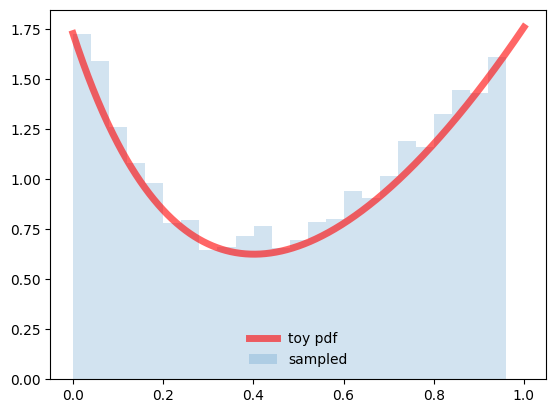

In [8]:
def toy_dist(x):
    C = 1/3 - np.exp(-4)/4 + 1/4
    return (x**2 + np.exp(-4*x)) / C

x = np.linspace(0,1,1000)

def accept_rejection_sampling(dist, size = 1):
    accepted = []
    acc_num = 0
    time = 0

    while acc_num != size:
        time +=1
        t = uniform.rvs(0, 1)
        u = uniform.rvs(0, max(dist))

        if toy_dist(t) > u:
            accepted.append(t)
            acc_num += 1

    print(f"It took [{time}] draws to draw [{size}] samples")

    return accepted

samples = accept_rejection_sampling(toy_dist(x), size = 10000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, toy_dist(x), 'r-', lw=5, alpha=0.6, label='toy pdf')
ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins = x[::40], label = "sampled")
ax.legend(loc='best', frameon=False)
plt.show()

# Probability space matters!
## Ex 5
Sample 2000 points from the unit disk. Do it in following ways:
1. Assume uniform distribution of radius (0,1) and argument (0,2$\pi$),  
2. Assume uniform distribution of x and y coordinate (-1,1). Drop values laying outside of the disk.   
Explain differences. between 1. and 2. Then:
3. Modify the solution of point 1. by changing the distribution of the radius in such a way, that we result in 2D distribution from 2.

Version 1


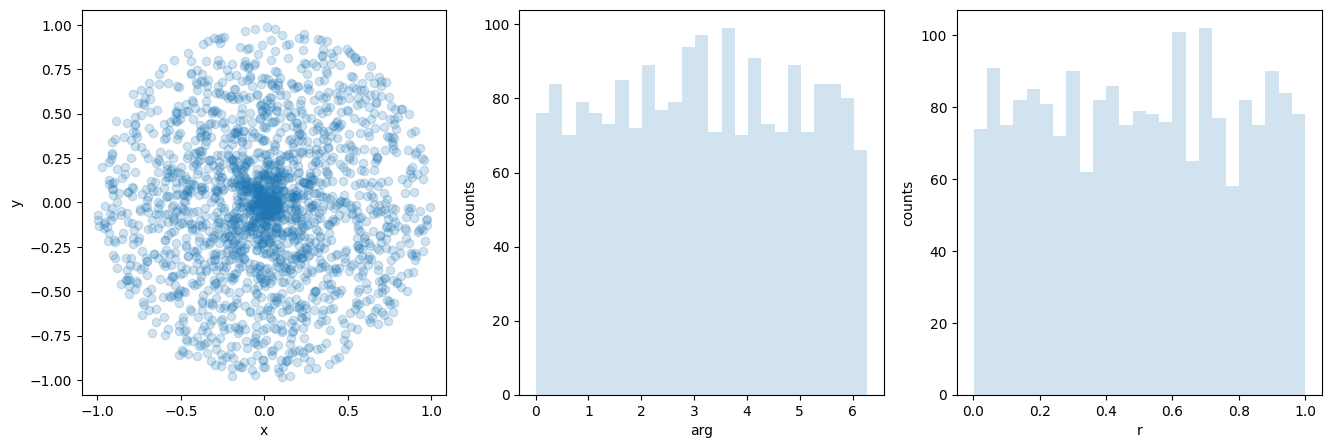

Version 2


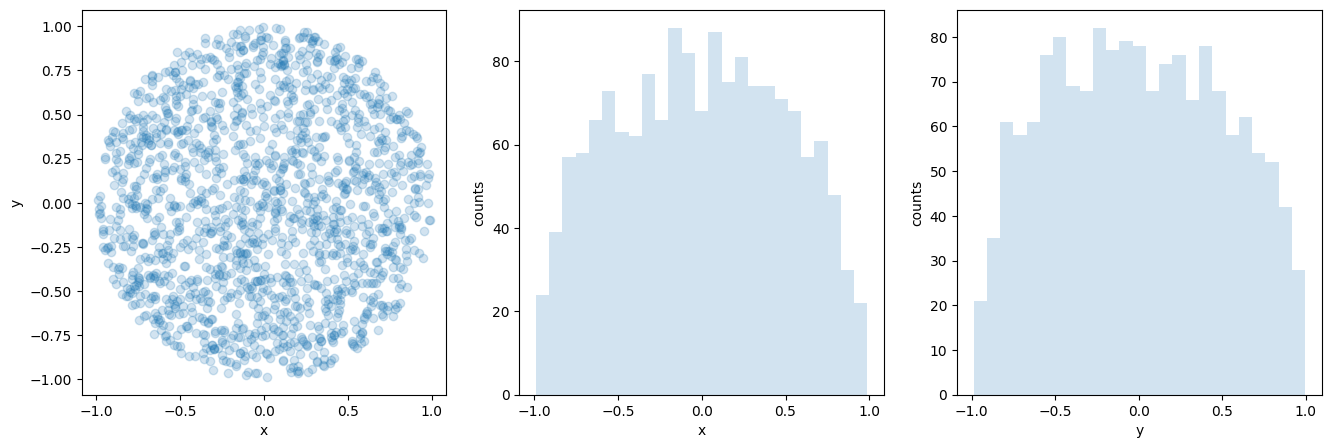

In [9]:
print("Version 1")

rv_uniform_rad = uniform(loc = 0, scale = 1)
rv_uniform_arg = uniform(loc = 0, scale = 2 * np.pi)
rad = rv_uniform_rad.rvs(2000)
arg = rv_uniform_arg.rvs(2000)
x = rad * np.sin(arg)
y = rad * np.cos(arg)

fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].scatter(x, y, alpha=0.2)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].hist(arg, histtype='stepfilled', alpha=0.2, bins=25)
ax[1].set_xlabel('arg')
ax[1].set_ylabel('counts')

ax[2].hist(rad, histtype='stepfilled', alpha=0.2, bins=25)
ax[2].set_xlabel('r')
ax[2].set_ylabel('counts')

plt.show()


print("Version 2")

rv_uniform = uniform(loc = -1, scale = 2)
x_mess = rv_uniform.rvs(2000)
y_mess = rv_uniform.rvs(2000)

x = []
y = []

for x1, y1 in zip(x_mess, y_mess):
    if np.sqrt(x1**2 + y1**2) < 1:
        x.append(x1)
        y.append(y1)

fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].scatter(x, y, alpha=0.2)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].hist(x, histtype='stepfilled', alpha=0.2, bins=25)
ax[1].set_xlabel('x')
ax[1].set_ylabel('counts')

ax[2].hist(y, histtype='stepfilled', alpha=0.2, bins=25)
ax[2].set_xlabel('y')
ax[2].set_ylabel('counts')

plt.show()

Here goes your explanation

Both approaches yield outcomes within the confines of a disk. The initial method consistently produces the specified number of samples, whereas the second method initially generates samples within a square and subsequently discards those lying outside the inscribed circle, resulting in a smaller number of samples.


Version 3


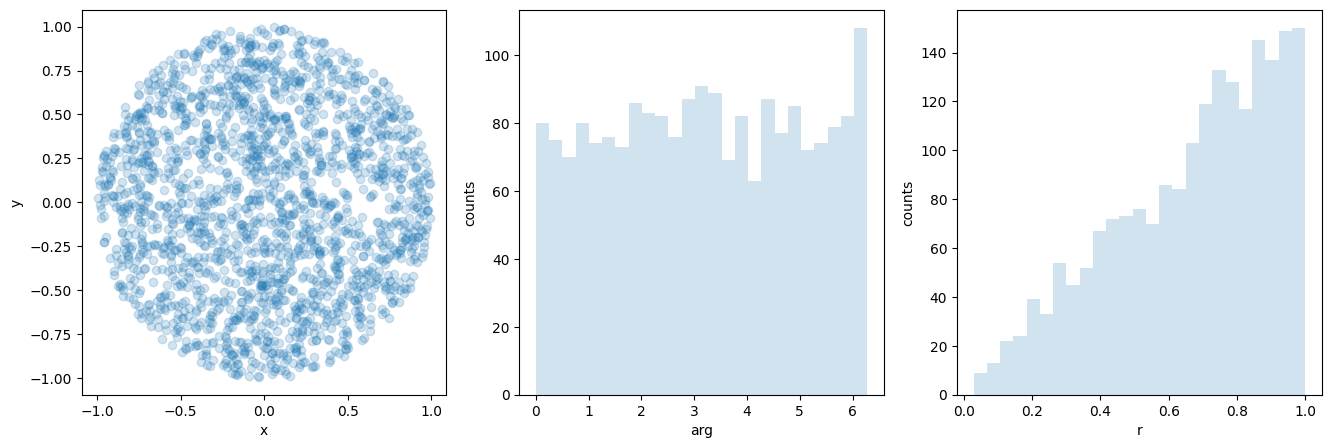

In [10]:
print("Version 3")

rv_uniform_rad = uniform(loc = 0, scale = 1)
rv_uniform_arg = uniform(loc = 0, scale = 2 * np.pi)
rad = np.sqrt(1 - rv_uniform_rad.rvs(2000))
arg = rv_uniform_arg.rvs(2000)
x = rad * np.sin(arg)
y = rad * np.cos(arg)

fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].scatter(x, y, alpha=0.2)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].hist(arg, histtype='stepfilled', alpha=0.2, bins=25)
ax[1].set_xlabel('arg')
ax[1].set_ylabel('counts')

ax[2].hist(rad, histtype='stepfilled', alpha=0.2, bins=25)
ax[2].set_xlabel('r')
ax[2].set_ylabel('counts')

plt.show()

## Application: Laplace equation, Dirichlet boundary conditions

#### Monte-Carlo procedure for solving 2D Laplace equation with Dirichlet boundary conditions
1. Start in a random position inside the boundaries,
2. With an equal probability move up/down/right/left until you hit the boundary,
3. After hitting the boundary we take the value $v_{b}$ of the function in the hitting point. We update the values of all points along the just finished random walk using the formula:
$$ v_{new} = \dfrac{nv_{old} + v_{b}}{n+1}, $$
where $n$ is a number of random walks which have already passed through this point.
4. Finish if the desired precision is achieved. If not, go back to 1.


A theory behind the above procedure can be found here:
https://www.uzh.ch/cmsssl/physik/dam/jcr:d559688c-1e7f-44ca-9fbe-aab0755c0b6e/empp18_MC_Markov.pdf

## Ex 6
Implement the method described above and solve numerically given Dirichlet problem. Plot few intermediate steps.

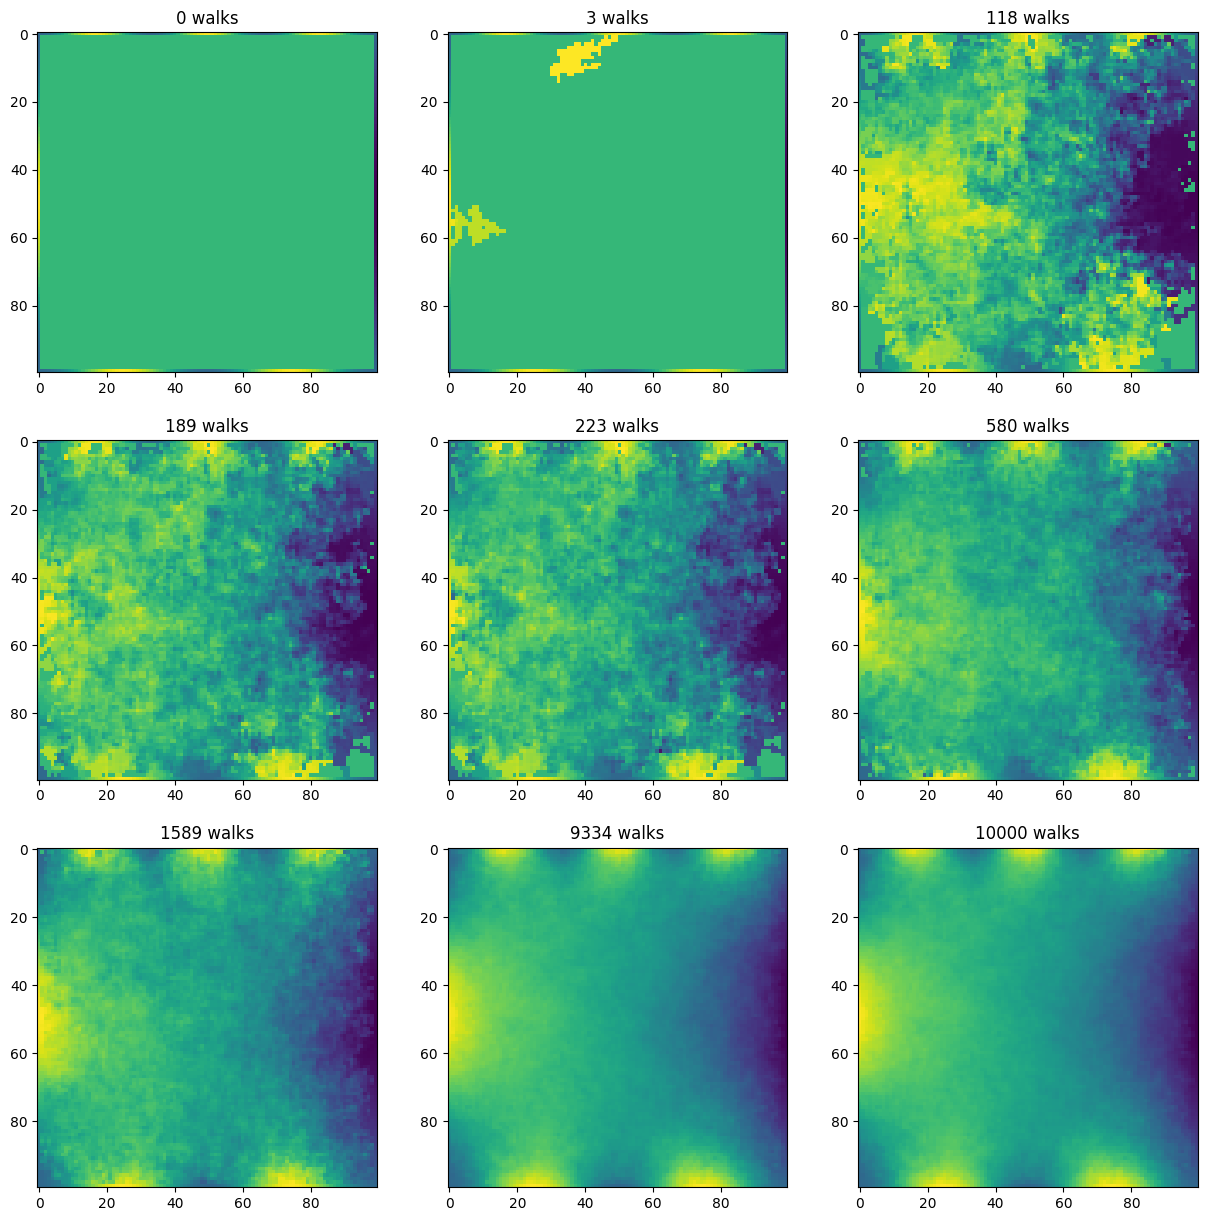

In [11]:
import copy
import random
S = 100
plane = np.zeros((S, S))
plane_counts = np.zeros((S, S))
plane[0] = np.cos(np.linspace(-1.5, 1.5, S) * 2 * np.pi)
plane[-1] = -np.cos(np.linspace(-1, 1, S) * 2 * np.pi)
plane[:, 0] = np.cos(np.linspace(-0.5, 0.5, S) * 2 * np.pi)
plane[:, -1] = -2 + np.linspace(-1, 1, S)**2

directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
walks = 0
precision = 1e-150
prev_error = 10
i = 1

plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.title("0 walks")
plt.imshow(plane)

while True:
    x, y = np.random.randint(1, S - 1, 2)
    walks += 1

    moves = []
    old_plane = copy.deepcopy(plane)

    while x > 0 and x < S - 1 and y > 0 and y < S - 1:
        moves.append((x, y))
        direction = random.choice(directions)
        x = x + direction[0]
        y = y + direction[1]

    vb = plane[x][y]

    for move in moves:
        m_x = move[0]
        m_y = move[1]
        plane[m_x][m_y] = (plane_counts[m_x][m_y] * plane[m_x][m_y] + vb) / (plane_counts[m_x][m_y] + 1)
        plane_counts[m_x][m_y] += 1

    error = np.linalg.norm(plane - old_plane)

    if walks == 1:
        prev_err = error
        i += 1

    if  i < 9 and walks > 1 and error < prev_error/2:
        prev_error = error
        plt.subplot(3, 3, i)
        plt.title(f"{walks} walks")
        plt.imshow(plane)
        i += 1

    if error < precision or walks == 10000:
        break
    else:
        continue

if i == 9:
    plt.subplot(3, 3, i)
    plt.title(f"{walks} walks")
    plt.imshow(plane)

The resulting plots show how the plane changes as the walks increase